# Data Management

Building a dataframe from which to sample datasets and assign labels. Can point to files and pass to featurizing pipeline.

In [1]:
import numpy as np
import pandas as pd
import librosa as lr
import glob
import matplotlib.pyplot as plt
import os

from IPython.display import Audio

In [2]:
#load existing datasets into separate dataframes

RIR_PATH = "/home/cxw/sonos_rirs/rirs"

ACE_PATH = os.path.join(RIR_PATH,'ace', 'Single/')

AIR_PATH = os.path.join(RIR_PATH,'air', 'wav')

OPENAIR_PATH = os.path.join(RIR_PATH,'openair')

## ACE

ACE contains subfolders with different rooms with several different samples.

We only care about the RIRs so we'll map the file with the room in the database entries

In [3]:
files = glob.glob(ACE_PATH+"**/**/*RIR.wav")
ace_pairs = []
ace_labels = []
for file in files:
    room = "ace_" + file.split('/')[7]
    ace_pairs.append((file, room))
    ace_labels.append(room)
ace_labels = list(set(ace_labels))

In [4]:
len(ace_pairs)

14

In [5]:
# in m^3, pulled from Eaton et al.
ace_vol_dict = {'ace_Office_1' : 47.3, 
                'ace_Lecture_Room_1' : 202,
                'ace_Meeting_Room_1' : 99.6,
                'ace_Office_2' : 48.3,
                'ace_Meeting_Room_2' : 246,
                'ace_Lecture_Room_2' : 370,
                'ace_Building_Lobby' : 72.9}


In [6]:
air_labels = ["air_booth","air_lecture", "air_meeting", "air_office"]
air_pairs = []
for key in air_labels:
    search = AIR_PATH+"/*{}*.wav".format(key)
    files = glob.glob(search)
    for file in np.sort(files):
        air_pairs.append((file, key))
        

In [7]:
len(air_pairs)

68

In [8]:
#in m^3, from Jeub et al.

air_vol_dict = {'air_booth' : 3.00 * 1.80 * 2.20,
                'air_lecture' : 10.80 * 10.90 * 3.15,
                'air_meeting' : 8.00 * 5.00 * 3.10,
                'air_office' : 5.00 * 6.40 * 2.90}

In [9]:
ace_df = pd.DataFrame(ace_pairs, columns=['file','room'])
ace_df['dataset'] = "ace"
ace_df['vol'] = ace_df['room'].apply(lambda x : ace_vol_dict[x])

air_df = pd.DataFrame(air_pairs, columns=['file','room'])
air_df['dataset'] = "air"
air_df['vol'] = air_df['room'].apply(lambda x : air_vol_dict[x])

In [10]:
ace_df.to_csv(os.path.join(ACE_PATH, 'ace_df.csv'))
air_df.to_csv(os.path.join(AIR_PATH, 'air_df.csv'))


In [11]:
pra_df = pd.read_csv(os.path.join(RIR_PATH, 'pra', '080322_pra_df.csv'), index_col=0)

In [12]:
rir_df = pd.concat([ace_df,air_df,pra_df])

In [13]:
rir_df.to_csv('/home/cxw/volest/volume-estimation/data/0721_rir_df.csv')

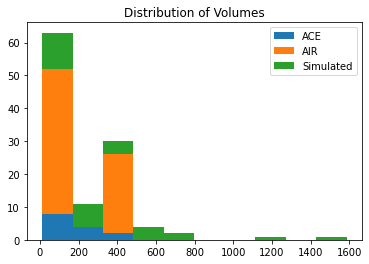

In [14]:
plt.title("Distribution of Volumes")
plt.hist([ace_df['vol'], air_df['vol'], pra_df['vol']], stacked=True, label=['ACE','AIR', 'Simulated'],bins=10)
plt.legend()

In [15]:
openair_rooms = os.listdir(OPENAIR_PATH)
openair_rooms = np.sort(openair_rooms)[1:] #removes .DS_Store

In [16]:
#from csv of volumes

vols = [
21000,
1560,
8000,
908.23,
2300,
35.2,
9000,
2000,
13000,
100,
3500,
18000,
2398.8,
9000,
6000,
2600,
3600,
8000,
4500,
3500,
40,
15700,
1140]

In [17]:
openair_tuples = []
for i, room in enumerate(openair_rooms):
    #vol_dict[room] = vols[i]
    room_audio_search = os.path.join(OPENAIR_PATH, room, 'b-format','*.wav')
    files = glob.glob(room_audio_search)
    for file in files:
        openair_tuples.append((file, room, 'openair', vols[i]))

In [18]:
openair_df = pd.DataFrame(openair_tuples, columns=['file', 'room', 'dataset', 'vol'])
openair_df

,file,room,dataset,vol
0,/home/cxw/sonos_rirs/rirs/openair/arthur-sykes...,arthur-sykes-rymer-auditorium-university-york,openair,21000.0
1,/home/cxw/sonos_rirs/rirs/openair/arthur-sykes...,arthur-sykes-rymer-auditorium-university-york,openair,21000.0
2,/home/cxw/sonos_rirs/rirs/openair/arthur-sykes...,arthur-sykes-rymer-auditorium-university-york,openair,21000.0
3,/home/cxw/sonos_rirs/rirs/openair/arthur-sykes...,arthur-sykes-rymer-auditorium-university-york,openair,21000.0
4,/home/cxw/sonos_rirs/rirs/openair/arthur-sykes...,arthur-sykes-rymer-auditorium-university-york,openair,21000.0
...,...,...,...,...
174,/home/cxw/sonos_rirs/rirs/openair/york-guildha...,york-guildhall-council-chamber,openair,15700.0
175,/home/cxw/sonos_rirs/rirs/openair/york-guildha...,york-guildhall-council-chamber,openair,15700.0
176,/home/cxw/sonos_rirs/rirs/openair/york-guildha...,york-guildhall-council-chamber,openair,15700.0
177,/home/cxw/sonos_rirs/rirs/openair/york-guildha...,york-guildhall-council-chamber,openair,15700.0


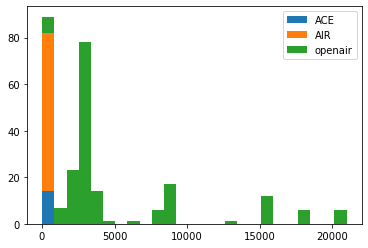

In [259]:
plt.hist([ace_df['vol'], air_df['vol'], openair_df['vol']], stacked=True, label=['ACE','AIR', 'openair'],bins=25)
plt.legend()

In [260]:
Audio('/home/cxw/sonos_rirs/rirs/BUT_ReverbDB/VUT_FIT_D105/MicID01/SpkID02_20170901_S/02/RIR/IR_sweep_15s_45Hzto22kHz_FS16kHz.v00.wav')

In [261]:
but_path = os.path.join(RIR_PATH, 'BUT_ReverbDB')
but_rooms = next(os.walk(but_path))[1]

but_tuples = []
for room in but_rooms:
    room_dir = os.path.join(but_path, room)
    room_df = pd.read_csv(os.path.join(room_dir, 'env_meta.txt'), sep='\t', header=None)\
                .transpose()
    room_df.columns = room_df.iloc[0]
    room_volume = float(room_df.iloc[1]['$EnvVolume'])
    
    speakers = os.listdir(os.path.join(room_dir, 'MicID01'))
    for spk in speakers:
        speaker_dir = os.path.join(room_dir, 'MicID01', spk)
        mic_df = pd.read_csv(os.path.join(speaker_dir, '01', 'mic_meta.txt'),
                             sep='\t', header=None).transpose()
        mic_df.columns = mic_df.iloc[0]
        mic_rate = float(mic_df.iloc[1]['$EnvMic1RecRate'])
        
        rir_path = os.path.join(speaker_dir, '01', 'RIR', '*.wav')
        rir_file = glob.glob(rir_path)[0]
        
        but_tuples.append((rir_file, room, 'BUT_ReverbDB', room_volume))

but_df = pd.DataFrame(but_tuples, columns=['file', 'room', 'dataset', 'vol'])


42
30


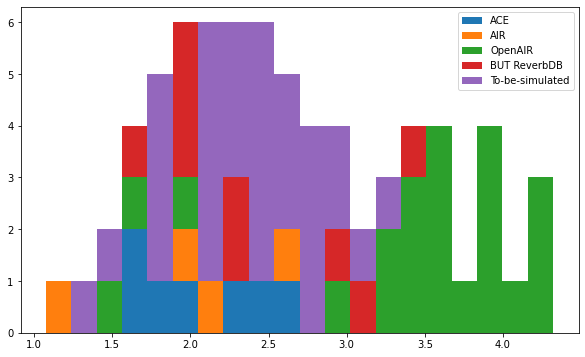

In [262]:
ace_vols = ace_df.drop_duplicates('room')['vol'].apply(np.log10)
air_vols = air_df.drop_duplicates('room')['vol'].apply(np.log10)
openair_vols = openair_df.drop_duplicates('room')['vol'].apply(np.log10)
but_vols = but_df.drop_duplicates('room')['vol'].apply(np.log10)

openair_lowvols = openair_vols[openair_vols<200]

add_vols = [1.3, 1.4, 1.76, 1.8, 1.82, 1.84,2.05, 2.1, 2.14, 2.19,2.2, 2.23,\
            2.3, 2.31, 2.39, 2.4, 2.43, 2.5, 2.53, 2.55, 2.6, 2.65, 2.7, 2.72,\
            2.75, 2.8, 2.87, 2.9, 3.1, 3.2]

#using this list to generate data


print(len(ace_vols) + len(air_vols) + len(openair_vols) + len(but_vols))
print(len(add_vols))


fig = plt.figure(figsize=(10,6))
plt.hist([ace_vols, air_vols, openair_lowvols, but_vols, add_vols], stacked=True,\
         label=['ACE','AIR', 'OpenAIR', 'BUT ReverbDB', 'To-be-simulated'],bins=20)
plt.legend()

In [263]:
pra_8df = pd.read_csv(os.path.join(RIR_PATH, 'pra','080322_pra_df.csv'))

In [264]:
rir_2_df = pd.concat([ace_df,air_df,openair_df, but_df, pra_8df]).reset_index()

<AxesSubplot:>

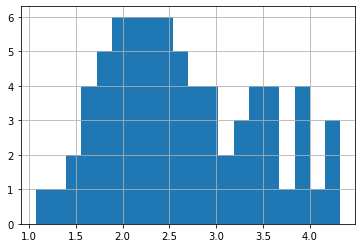

In [265]:
rir_2_df.drop_duplicates('room')['vol'].apply(np.log10).hist(bins=20)

In [266]:
rir_2_df.to_csv('/home/cxw/volest/volume-estimation/data/0803_rir_df.csv', index=False)

In [267]:
rir_2_df = pd.read_csv('/home/cxw/volest/volume-estimation/data/0803_rir_df.csv') 
print(rir_2_df.columns)

Index(['index', 'file', 'room', 'dataset', 'vol'], dtype='object')


In [268]:
# from scipy.io import loadmat

# boston_path = os.path.join(RIR_PATH, 'sonos_boston')
# boston_rir_names = os.listdir(boston_path)
# boston_rir_names.sort()

# test_mat = loadmat(os.path.join(boston_path, boston_rir_names[5]))

# print()
# print("Rate: {}".format(test_mat['specs'][0][0][5][0][0]))
# print()
# print("Dims: {}".format(test_mat['specs'][0][0][8][0]))
# print()
# print("Data: {}".format(test_mat['data'][0][0][0].shape))
# Audio(data=test_mat['data'][0][0][0][:,0], rate = 44100)

In [269]:
# test_mat = loadmat(os.path.join(boston_path, boston_rir_names[0]))

# print("Data: {}".format(test_mat['data'][0].shape))
# print("Data: {}".format(test_mat['data'][0][0][0][:,0].shape))

# for i in range(4):
#     print(test_mat['data'][0][i][0].shape)
    
# plt.plot(test_mat['data'][0][0][0])

In [270]:
import soundfile as sf

In [271]:
# #save_audio
# rir_wav_path = '/scratch/ci411/sonos_rirs/rirs/sonos_boston/wav'
# boston_df = pd.DataFrame(columns=rir_2_df.columns)

# paths = []
# for room in boston_rir_names:
#     room_tag = room.split('.')[0]
#     print(room_tag)
#     room_path = os.path.join(boston_path, room)
#     mat = loadmat(room_path)
#     rate = mat['specs'][0][0][5][0][0]
#     dims = mat['specs'][0][0][8][0]
#     vol = dims[0] * dims[1] * dims[2]
    
#     new_row = {'room':room_tag, 'dataset':'sonos_boston', 'vol':vol}
#     print("Rate: {}\tVol: {}".format(rate, vol))
#     for i in range(3):
#         rir_tag = room_tag + '_{}'.format(i)
#         rir_data = mat['data'][0][i][0][:,0]
#         rir_data = rir_data/(max(rir_data))
#         print('RIR: {}\tShape: {}'.format(rir_tag, rir_data.shape))
#         wav_path = os.path.join(rir_wav_path, rir_tag+'.wav')
#         print("Saving to {}".format(wav_path))
#         sf.write(wav_path, rir_data, rate)
#         paths.append(wav_path)
        
#         new_row['file'] = wav_path
#         boston_df = boston_df.append(new_row, ignore_index=True)
        
#     print()
# boston_df

In [272]:
# i = 3
# print(paths[i])
# Audio(filename=paths[i], rate=rate)

In [273]:
# boston_df.to_csv('/scratch/ci411/sonos_rirs/rirs/sonos_boston/sonos_boston.csv', index=False)

In [274]:
# rir_3_df = pd.concat([rir_2_df, boston_df], ignore_index=True)

In [279]:
# rir_2_df.to_csv('/home/cxw/volest/volume-estimation/data/0812_rir_df.csv', index=False)
rir_2_df = pd.read_csv('/home/cxw/volest/volume-estimation/data/0812_rir_df.csv')

Text(0.5, 1.0, 'Volume by Dataset')

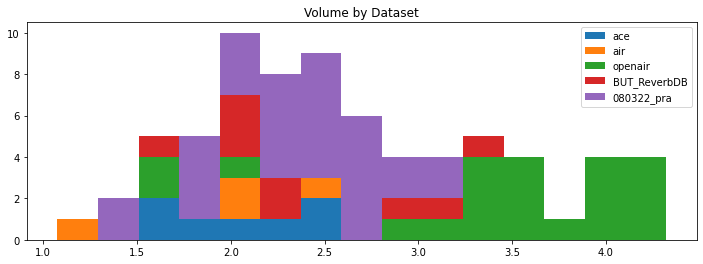

In [280]:
datasets = rir_2_df['dataset'].unique()
unique_rooms = rir_2_df.drop_duplicates('room')
fig = plt.figure(figsize=(12,4))
bins = 15
log_vols = []
for dataset in datasets:
    sub_df = unique_rooms[unique_rooms['dataset']==dataset]
    vols = sub_df['vol'].to_numpy()
    log_vols.append(np.log10(vols))
    
plt.hist(log_vols, bins=bins, stacked=True, label=datasets)
plt.legend()
plt.title("Volume by Dataset")

Text(0.5, 1.0, 'RT60 by Dataset')

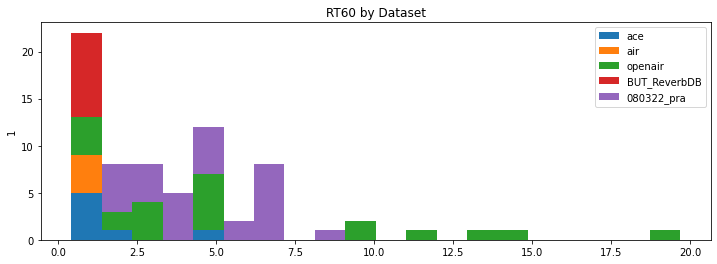

In [282]:
datasets = rir_2_df['dataset'].unique()
unique_rooms = rir_2_df.drop_duplicates('room')
fig = plt.figure(figsize=(12,4))
bins = 20
rt60s_all = []
for dataset in datasets:
    sub_df = unique_rooms[unique_rooms['dataset']==dataset]
    rt60s = sub_df['mean_rt60'].to_numpy()
    rt60s_all.append(rt60s)
    
plt.hist(rt60s_all, bins=bins, stacked=True, label=datasets)
plt.ylabel(1)
plt.legend()
plt.title("RT60 by Dataset")

In [283]:
real_rooms = unique_rooms[unique_rooms['dataset']!='080322_pra']

['st-margarets-church-national-centre-early-music', 'ace_Lecture_Room_1', 'VUT_FIT_D105', 'york-guildhall-council-chamber', 'air_lecture', 'arthur-sykes-rymer-auditorium-university-york', 'st-patricks-church-patrington', 'falkland-palace-royal-tennis-court', 'heslington-church-vaa-group-2', 'genesis-6-studio-live-room-drum-set']


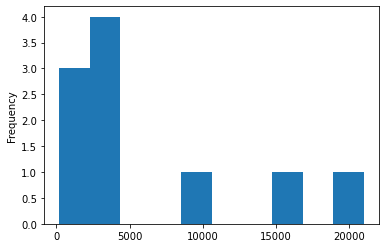

In [284]:
sample = real_rooms.sample(10)
sample['vol'].plot.hist()
print(sample['room'].tolist())